# American Ultimate Disc League (AUDL) - web scraping

### Data to be extracted from the AUDL website: 
    - player statistics for 2022 season 
    - player info such as age, height, weight, team and jersey number 

In [1]:
# Libraries needed

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import requests 
from bs4 import BeautifulSoup as bs
import os
import urllib
import time
from time import sleep

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver import ActionChains
import warnings

In [2]:
warnings.filterwarnings('ignore')

# 1. WEB SCRAPING - Player statistics table

In [3]:
# extracting AUDL player statistics tables for 2022 season
# website: https://theaudl.com/stats/player-stats?year=2022 

all_rows = []
driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

for x in range(0,50): 
    url = f"https://theaudl.com/stats/player-stats?page={x + 1}&year=2022"
    driver.get(url)
    time.sleep(2)
    soup = bs(driver.page_source, 'lxml')
    time.sleep(2)
    
    column_names = [i.text for i in soup.select('tr.even.svelte-16n93gz>th.svelte-16n93gz')]
    
    odd_rows = [i.text for i in soup.select('tr.odd.svelte-16n93gz>td.svelte-16n93gz')]
    odd_rows = np.array(odd_rows).reshape(-1, 26)
    all_rows.append(odd_rows)

    
    even_rows = [i.text for i in soup.select('tr.even.svelte-16n93gz>td.svelte-16n93gz')]
    even_rows = np.array(even_rows).reshape(-1, 26)
    all_rows.append(even_rows)  

/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/2079681423.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")


In [117]:
# creating an array from the lists generated above

array = np.array(all_rows, dtype=object)

# preview the first scraped page
array[:1]

array([array([['Ryan Osgar  - EC, NY', '16', '330', '379', '121', '74', '47',
               '3', '106', '497', '96.69', '7696', '3579', '4117', '68.87',
               '48', '15', '2', '3', '0', '25', '86.21', '0', '312', '18',
               '353'],
              ['Leandro Marx  - POR, SW', '13', '405', '483', '113', '60', '53',
               '10', '87', '361', '90.02', '8220', '2612', '5608', '45.55',
               '40', '30', '1', '6', '0', '22', '70.97', '29', '353', '52',
               '402'],
              ['Ben Jagt  - EC, NY', '16', '387', '330', '95', '39', '56', '11',
               '81', '197', '88.74', '5625', '1341', '4284', '64.55', '25',
               '24', '0', '1', '0', '5', '31.25', '84', '177', '210', '387'],
              ['Cameron Brock  - EC, IND', '14', '349', '383', '80', '21', '59',
               '2', '72', '246', '96.47', '4905', '1267', '3638', '57.44', '25',
               '5', '1', '5', '0', '2', '66.67', '0', '316', '33', '358'],
              ['Pawe

In [119]:
# melting the array of arrays 

final_rows = list(np.concatenate(array))
final_rows[:3]

[array(['Ryan Osgar  - EC, NY', '16', '330', '379', '121', '74', '47', '3',
        '106', '497', '96.69', '7696', '3579', '4117', '68.87', '48', '15',
        '2', '3', '0', '25', '86.21', '0', '312', '18', '353'],
       dtype='<U33'),
 array(['Leandro Marx  - POR, SW', '13', '405', '483', '113', '60', '53',
        '10', '87', '361', '90.02', '8220', '2612', '5608', '45.55', '40',
        '30', '1', '6', '0', '22', '70.97', '29', '353', '52', '402'],
       dtype='<U33'),
 array(['Ben Jagt  - EC, NY', '16', '387', '330', '95', '39', '56', '11',
        '81', '197', '88.74', '5625', '1341', '4284', '64.55', '25', '24',
        '0', '1', '0', '5', '31.25', '84', '177', '210', '387'],
       dtype='<U33')]

In [6]:
# turning the arrays into a data frame 

df = pd.DataFrame(final_rows, columns=column_names)
df

,Player,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,...,T,S,D,C,Hck,Hck%,Pul,OPP,DPP,MP
0,"Ryan Osgar - EC, NY",16,330,379,121,74,47,3,106,497,...,15,2,3,0,25,86.21,0,312,18,353
1,"Leandro Marx - POR, SW",13,405,483,113,60,53,10,87,361,...,30,1,6,0,22,70.97,29,353,52,402
2,"Ben Jagt - EC, NY",16,387,330,95,39,56,11,81,197,...,24,0,1,0,5,31.25,84,177,210,387
3,"Cameron Brock - EC, IND",14,349,383,80,21,59,2,72,246,...,5,1,5,0,2,66.67,0,316,33,358
4,Pawel Janas - CHI,15,351,417,99,74,25,1,71,741,...,28,0,1,0,15,53.57,1,349,2,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Benjamin Liu-May - POR,4,79,62,3,2,1,1,-5,42,...,7,0,2,0,1,33.33,15,35,44,65
991,Mark Lin - NY,4,49,40,2,2,0,1,-5,29,...,7,0,1,0,0,0.00,11,1,48,67
992,Kevin Christian - POR,8,190,244,14,13,1,5,-6,330,...,24,0,1,0,2,20.00,0,189,1,190
993,Conor Tabor - COL,8,97,55,6,6,0,0,-7,58,...,13,0,0,0,6,54.55,60,1,96,107


In [7]:
# exporting the data frame 

df.to_csv('player_stats.csv')

# 2. WEB SCRAPING - Player personal info

## 2.1 Retrieving URLs for all 2022 players 

In [8]:
# URLs for individual players from the same online tables as above 

player_urls = []
driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

for x in range(0,50): 
    url = f"https://theaudl.com/stats/player-stats?page={x + 1}&year=2022"
    driver.get(url)
    time.sleep(2)
    soup = bs(driver.page_source, 'lxml')
    time.sleep(2)
    
    urls = [i['href'] for i in soup.select('td.svelte-16n93gz>a')]
    
    player_urls.append(urls)  
    


/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/1909401702.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")


In [9]:
# flatten the list of URLS
player_urls = [element for innerList in player_urls for element in innerList]

## 2.2 Creating a dataframe with personal info

In [12]:
# looping through the URLs to access the websites of each player and scraping the info from those websites 
# the result is a dictionary of values for each player

player_dic = {}


for x in player_urls:
    driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
    driver.get(x)
    time.sleep(0.5)
    soup = bs(driver.page_source, 'lxml')
    time.sleep(0.5)
    
    container = soup.select('div.views-row.views-row-1.views-row-odd.views-row-first.views-row-last')
    for i in container: 
        
        info_keys = [i.text.strip() for i in soup.select('div.audl-personal-stats-item>span:nth-child(1)')]
        info_values = [i.text.strip() for i in soup.select('div.audl-personal-stats-item>span.audl-personal-stats-value')]
        
        info_dic = {key:value for key,value in zip(info_keys,info_values)}
        
        name = [i.text for i in soup.select('div.audl-player-display-name')]
        name = ' '.join(name)
        
        team = [i.text for i in soup.select('div.audl-player-info>div:nth-child(2)')]
        team = ' '.join(team)
        
        jersey = [i.text for i in soup.select('div.audl-player-info>div:nth-child(3)')]
        jersey = ' '.join(jersey)

        
        info_dic['team_name'] = team
        info_dic['jersey'] = jersey
    
        player_dic[name] = info_dic
        
        
        

/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/904881198.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/904881198.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/904881198.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/904881198.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")
/var/folders/_z/jgws13r912d2gycqh3y5

In [14]:
# turning the resulting dictionary into a dataframe

pd.DataFrame(player_dic)

,Ryan Osgar,Jordan Kerr,Leandro Marx,Quinn Finer,Ben Jagt,Kyle Henke,Cameron Brock,Evan Swiatek,Pawel Janas,Ross Barker,...,Benjamin Liu-May,Logan Dufour,Mark Lin,Sam VanDusen,Kevin Christian,Trevor Polisuk-Balfour,Conor Tabor,David Innis,Brandon Perales,Tom Chrzanowski
HEIGHT,"6'1""",NaN,NaN,NaN,"6'6""","6'3""","5'11""",5'10,"5'10""","6'0""",...,NaN,NaN,"6'0""","6'0""","5'9""",NaN,NaN,5'10,"5'9""",NaN
WEIGHT,170,NaN,NaN,NaN,188,175,172,145,170,178,...,NaN,NaN,175,170,155,NaN,NaN,155,170,NaN
AGE/DOB,"November 24, 1992",NaN,NaN,NaN,"August 20, 1992","June 23, 1998","November 12, 1988","July 19, 1993","September 25, 1993","February 24, 1994",...,NaN,NaN,"March 3, 1993","January 26, 1994",NaN,NaN,NaN,"September 13, 1996","October 18, 1981",NaN
COLLEGE,Minnesota,NaN,NaN,NaN,Minnesota,Texas Tech,Ball State,Marquette Universtiy,Colorado,Wisconsin,...,NaN,NaN,Maryland,Pittsburgh,Oklahoma,NaN,NaN,University of Michigan,Florida State,NaN
team_name,New York Empire / Hybrid,Salt Lake Shred,Portland Nitro,Colorado Summit,New York Empire / Hybrid,Austin Sol,Indianapolis AlleyCats / Cutter,Austin Sol,Chicago Union / Handler,Chicago Union / Cutter,...,Portland Nitro,Toronto Rush,New York Empire,Pittsburgh Thunderbirds / Handler,Portland Nitro / Handler,Detroit Mechanix,Colorado Summit,Detroit Mechanix,Tampa Bay Cannons / Handler,Tampa Bay Cannons
jersey,#1,#66,#10,#88,#4,#23,#3,#5,#55,#25,...,#2,#52,#33,#95,#21,#4,#25,#11,#5,#34
NICKNAME,NaN,NaN,NaN,NaN,Yacht,Stinky,NaN,Swi,NaN,NaN,...,NaN,NaN,NaN,Sam Van,Falkor,NaN,NaN,NaN,NaN,NaN


In [15]:
# transposing the dataframe

df = pd.DataFrame(player_dic).T

In [17]:
# exporting the dataframe

df.to_csv('player_info.csv')

## 2.3 Downloading profile pictures

In [1216]:
# optional step just for fun if you want to make a photo collage 

driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")

for x in player_urls(0,5): # remove range if you want to download all pictures
    driver.get(x)
    time.sleep(1)
    soup = bs(driver.page_source, 'lxml')
    time.sleep(1)
    name = [i.text for i in soup.select('div.audl-player-info>div:nth-child(1)')]
    name = ' '.join(name)

    with open(f'{name}.png', 'wb') as file:
        path = '//*[@id="block-views-player-page-home-block"]/div/div/div/div[1]/div[1]/img'
        l = driver.find_element(By.XPATH, path) 
        file.write(l.screenshot_as_png)

driver.quit()


/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_1199/3840318638.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:\Program Files (x86)\chromedriver.exe")


# 3. CLEANING - player info and statistics dataframes

## 3.1 Player statistics table cleaning 

### Cleaning plan: 

- 1. Reset index 
- 2. Split name column into name and team abbreviation 
- 3. Inspect for inconsistencies, replace '--'' with NA values, convert data 


In [18]:
stats_df = pd.read_csv('player_stats.csv')

### 1. Reset index

In [20]:
stats_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [21]:
stats_df.reset_index(drop = True)

,Player,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,...,T,S,D,C,Hck,Hck%,Pul,OPP,DPP,MP
0,"Ryan Osgar - EC, NY",16,330,379,121,74,47,3,106,497,...,15,2,3,0,25,86.21,0,312,18,353
1,"Leandro Marx - POR, SW",13,405,483,113,60,53,10,87,361,...,30,1,6,0,22,70.97,29,353,52,402
2,"Ben Jagt - EC, NY",16,387,330,95,39,56,11,81,197,...,24,0,1,0,5,31.25,84,177,210,387
3,"Cameron Brock - EC, IND",14,349,383,80,21,59,2,72,246,...,5,1,5,0,2,66.67,0,316,33,358
4,Pawel Janas - CHI,15,351,417,99,74,25,1,71,741,...,28,0,1,0,15,53.57,1,349,2,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Benjamin Liu-May - POR,4,79,62,3,2,1,1,-5,42,...,7,0,2,0,1,33.33,15,35,44,65
991,Mark Lin - NY,4,49,40,2,2,0,1,-5,29,...,7,0,1,0,0,0.00,11,1,48,67
992,Kevin Christian - POR,8,190,244,14,13,1,5,-6,330,...,24,0,1,0,2,20.00,0,189,1,190
993,Conor Tabor - COL,8,97,55,6,6,0,0,-7,58,...,13,0,0,0,6,54.55,60,1,96,107


### 2. Split name column into name and team abbreviation 

In [22]:
# extract the team abbreviation 

stats_df['team'] = stats_df.Player.str.extract('(\s - \w*)')

In [23]:
stats_df['team'] = stats_df['team'].str.replace(r'-', '').str.strip()

In [24]:
stats_df['team'].unique()

array(['EC', 'POR', 'CHI', 'SLC', 'CAR', 'TOR', 'SD', 'COL', 'ATX', 'NY',
       'DC', 'PHI', 'MIN', 'OTT', 'IND', 'ATL', 'LA', 'PIT', 'DET', 'OAK',
       'DAL', 'MAD', 'BOS', 'MTL', 'TB', 'SEA', 'SW'], dtype=object)

In [25]:
# extract the players name by removing team abbreviations  

stats_df['name'] = stats_df.Player.str.replace('((\s - |, )\w*)', '').str.strip()

/var/folders/_z/jgws13r912d2gycqh3y5tpvw0000gn/T/ipykernel_17269/3258150675.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  stats_df['name'] = stats_df.Player.str.replace('((\s - |, )\w*)', '').str.strip()


In [26]:
# just one duplicate in name but not the same person, keep for now 

stats_df.loc[stats_df['name'].duplicated(keep = False)]

,Player,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,...,D,C,Hck,Hck%,Pul,OPP,DPP,MP,team,name
610,"Alex Liu - ATL, MAD",4,46,30,1,1,0,4,2,23,...,0,0,0,--,0,0,46,55,ATL,Alex Liu
733,Alex Liu - MAD,0,0,0,0,0,0,0,0,0,...,0,0,0,--,0,0,0,0,MAD,Alex Liu


### 3. Inspect for inconsistencies, Replace '--'' with NA values, convert data

In [27]:
# clean up column names 

stats_df.columns

Index(['Player', 'G  ', 'PP  ', 'POS  ', 'SCR  ', 'AST  ', 'GLS  ', 'BLK  ',
       '+/- ▼ ', 'Cmp  ', 'Cmp%  ', 'Y  ', 'TY  ', 'RY  ', 'OEFF  ', 'HA  ',
       'T  ', 'S  ', 'D  ', 'C  ', 'Hck  ', 'Hck%  ', 'Pul  ', 'OPP  ',
       'DPP  ', 'MP  ', 'team', 'name'],
      dtype='object')

In [28]:
stats_df.columns = stats_df.columns.str.strip()

In [29]:
stats_df.columns 

Index(['Player', 'G', 'PP', 'POS', 'SCR', 'AST', 'GLS', 'BLK', '+/- ▼', 'Cmp',
       'Cmp%', 'Y', 'TY', 'RY', 'OEFF', 'HA', 'T', 'S', 'D', 'C', 'Hck',
       'Hck%', 'Pul', 'OPP', 'DPP', 'MP', 'team', 'name'],
      dtype='object')

#### After inspecting each column, need to convert: 

- All '--' values into NA 
- Columns G-Cmp, Y, TY, HA, T, S, D, C, Hck, Pul, OPP, DPP, MP into integers
- Cmp%, OEFF, Hck% into floats 

In [30]:
stats_df[['G', 'PP', 'POS', 'SCR', 'AST', 'GLS', 'BLK', '+/- ▼', 'Cmp', 'Y', 'TY', 'RY', 'HA', 'T', 'S', 'D', 'C', 'Hck', 'Pul', 'OPP', 'DPP', 'MP']].astype(int)

,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,Y,...,HA,T,S,D,C,Hck,Pul,OPP,DPP,MP
0,16,330,379,121,74,47,3,106,497,7696,...,48,15,2,3,0,25,0,312,18,353
1,13,405,483,113,60,53,10,87,361,8220,...,40,30,1,6,0,22,29,353,52,402
2,16,387,330,95,39,56,11,81,197,5625,...,25,24,0,1,0,5,84,177,210,387
3,14,349,383,80,21,59,2,72,246,4905,...,25,5,1,5,0,2,0,316,33,358
4,15,351,417,99,74,25,1,71,741,8218,...,54,28,0,1,0,15,1,349,2,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,4,79,62,3,2,1,1,-5,42,649,...,2,7,0,2,0,1,15,35,44,65
991,4,49,40,2,2,0,1,-5,29,241,...,5,7,0,1,0,0,11,1,48,67
992,8,190,244,14,13,1,5,-6,330,2882,...,21,24,0,1,0,2,0,189,1,190
993,8,97,55,6,6,0,0,-7,58,807,...,3,13,0,0,0,6,60,1,96,107


### 4. Replace '--'' with NA values 

In [31]:
stats_df[['Cmp%', 'OEFF', 'Hck%']] = stats_df[['Cmp%', 'OEFF', 'Hck%']].replace('--', np.nan)

In [32]:
stats_df[['Cmp%', 'OEFF', 'Hck%']] = stats_df[['Cmp%', 'OEFF', 'Hck%']].astype(float)

In [33]:
# all data is in the right format now

stats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  995 non-null    object 
 1   G       995 non-null    int64  
 2   PP      995 non-null    int64  
 3   POS     995 non-null    int64  
 4   SCR     995 non-null    int64  
 5   AST     995 non-null    int64  
 6   GLS     995 non-null    int64  
 7   BLK     995 non-null    int64  
 8   +/- ▼   995 non-null    int64  
 9   Cmp     995 non-null    int64  
 10  Cmp%    597 non-null    float64
 11  Y       995 non-null    int64  
 12  TY      995 non-null    int64  
 13  RY      995 non-null    int64  
 14  OEFF    729 non-null    float64
 15  HA      995 non-null    int64  
 16  T       995 non-null    int64  
 17  S       995 non-null    int64  
 18  D       995 non-null    int64  
 19  C       995 non-null    int64  
 20  Hck     995 non-null    int64  
 21  Hck%    571 non-null    float64
 22  Pu

In [34]:
stats_df.to_csv('cleaned_player_stats.csv')

## 3.2. Player info cleaning

In [35]:
player_df = pd.read_csv('player_info.csv')

In [36]:
player_df

,Unnamed: 0,HEIGHT,WEIGHT,AGE/DOB,COLLEGE,team_name,jersey,NICKNAME
0,Ryan Osgar,"6'1""",170,"November 24, 1992",Minnesota,New York Empire / Hybrid,#1,NaN
1,Jordan Kerr,NaN,NaN,NaN,NaN,Salt Lake Shred,#66,NaN
2,Leandro Marx,NaN,NaN,NaN,NaN,Portland Nitro,#10,NaN
3,Quinn Finer,NaN,NaN,NaN,NaN,Colorado Summit,#88,NaN
4,Ben Jagt,"6'6""",188,"August 20, 1992",Minnesota,New York Empire / Hybrid,#4,Yacht
...,...,...,...,...,...,...,...,...
989,Trevor Polisuk-Balfour,NaN,NaN,NaN,NaN,Detroit Mechanix,#4,NaN
990,Conor Tabor,NaN,NaN,NaN,NaN,Colorado Summit,#25,NaN
991,David Innis,5'10,155,"September 13, 1996",University of Michigan,Detroit Mechanix,#11,NaN
992,Brandon Perales,"5'9""",170,"October 18, 1981",Florida State,Tampa Bay Cannons / Handler,#5,NaN


### Cleaning plan: 

    1. Rename columns and reset index
    2. Age/DOB - extract the year, calculate age in 2022, make a new column with integer values
    3. Height - convert to cm, make a new column with integer values
    4. Weight - convert to integer
    5. Jersey - remove # sign, make numeric 
    
    6. Inspect cleaned data and save as a new dataframe 

### 1. Rename columns and reset index 

In [39]:
# renaming columns

player_df.rename(columns = {'Unnamed: 0':'name', 
                            'HEIGHT':'height', 
                            'WEIGHT':'weight',
                            'AGE/DOB':'DOB',
                            'COLLEGE':'college',
                           'team_name':'team',
                           'NICKNAME':'nickname'}, inplace = True)

In [40]:
# resetting index 

player_df.reset_index(drop = True)

,name,height,weight,DOB,college,team,jersey,nickname
0,Ryan Osgar,"6'1""",170,"November 24, 1992",Minnesota,New York Empire / Hybrid,#1,NaN
1,Jordan Kerr,NaN,NaN,NaN,NaN,Salt Lake Shred,#66,NaN
2,Leandro Marx,NaN,NaN,NaN,NaN,Portland Nitro,#10,NaN
3,Quinn Finer,NaN,NaN,NaN,NaN,Colorado Summit,#88,NaN
4,Ben Jagt,"6'6""",188,"August 20, 1992",Minnesota,New York Empire / Hybrid,#4,Yacht
...,...,...,...,...,...,...,...,...
989,Trevor Polisuk-Balfour,NaN,NaN,NaN,NaN,Detroit Mechanix,#4,NaN
990,Conor Tabor,NaN,NaN,NaN,NaN,Colorado Summit,#25,NaN
991,David Innis,5'10,155,"September 13, 1996",University of Michigan,Detroit Mechanix,#11,NaN
992,Brandon Perales,"5'9""",170,"October 18, 1981",Florida State,Tampa Bay Cannons / Handler,#5,NaN


### 2. Age/DOB

In [41]:
# extract year value from DOB using regex 
import re

player_df['birth_year'] = player_df.DOB.str.extract('(\d{4})')

In [42]:
# inspecting year column 

player_df['birth_year'].unique()

array(['1992', nan, '1998', '1988', '1993', '1994', '1990', '1989',
       '1996', '1991', '1995', '1986', '1999', '2003', '1997', '2000',
       '1987', '2001', '1984', '2002', '2004', '1982', '1985', '2022',
       '1977', '1983', '1981'], dtype=object)

In [43]:
# calculate age in 2022 

player_df['age'] = 2022 - player_df['birth_year'].astype('Int64')

In [44]:
# checking for unique age values 
# have one person with 0 in date of birht as DOB was added wrongly 

player_df['age'].unique()

<IntegerArray>
[  30, <NA>,   24,   34,   29,   28,   32,   33,   26,   31,   27,   36,   23,
   19,   25,   22,   35,   21,   38,   20,   18,   40,   37,    0,   45,   39,
   41]
Length: 27, dtype: Int64

In [45]:
# finding the player with age 0 and bith year 2022
player_df.loc[player_df.age == 0]

,name,height,weight,DOB,college,team,jersey,nickname,birth_year,age
405,Chris Chan,"6'0""",NaN,"May 30, 2022",McMaster University,Toronto Rush / Handler,#90,NaN,2022,0


In [46]:
# setting the age and bith year for this player to NaN value 
player_df.loc[405, 'age'] = np.nan
player_df.loc[405, 'birth_year'] = np.nan

In [47]:
# double checking that the change was introduced 

player_df.loc[405] 

name                      Chris Chan
height                          6'0"
weight                           NaN
DOB                     May 30, 2022
college          McMaster University
team          Toronto Rush / Handler
jersey                           #90
nickname                         NaN
birth_year                       NaN
age                             <NA>
Name: 405, dtype: object

### 3. Height

In [48]:
player_df['height'].value_counts()

6'0"        64
6'1"        60
5'11"       48
5'10"       45
6'2"        37
5'9"        29
5'8"        27
6'3"        26
6'4"        13
5'7"        10
6'0          7
6'3          6
6'5"         6
5'10         6
6'2''        5
6'6"         5
6'1''        4
5'6"         4
5'9''        4
5'10''       4
6'0''        4
6'1          4
5'11''       3
5' 8"        3
6'7"         2
5'11         2
5'8          2
5' 11"       2
6'2          2
5'9:         1
6’7”         1
6' 2"        1
5'5          1
5'2"         1
5'5"         1
6'           1
5'10'        1
5’11”        1
6' 3"        1
5' 7"        1
6’2”         1
5'8''        1
6’1”         1
5’10         1
5'7''        1
4/6/1992     1
5'9          1
6' 0"        1
6' 5"        1
6'3''        1
5’10”        1
Name: height, dtype: int64

In [49]:
# Inspect the row that has date of birth in the weight column 
player_df.loc[player_df.height == '4/6/1992']

,name,height,weight,DOB,college,team,jersey,nickname,birth_year,age
359,Curtis Campbell,4/6/1992,165,"November 4, 1998",NaN,Ottawa Outlaws / Hybrid,#17,NaN,1998,24


In [50]:
# replace that with NA

player_df.loc[359, 'height'] = np.nan

In [51]:
# check that the change was made 
player_df.loc[359]

name                  Curtis Campbell
height                            NaN
weight                            165
DOB                  November 4, 1998
college                           NaN
team          Ottawa Outlaws / Hybrid
jersey                            #17
nickname                          NaN
birth_year                       1998
age                                24
Name: 359, dtype: object

In [1875]:
# extract feet and make a new column 

In [52]:
player_df['height_feet'] = player_df.height.str.extract('(\d{1})')

In [53]:
player_df['height_feet'].unique()

array(['6', nan, '5'], dtype=object)

In [1878]:
# extract inches and make a new column 

In [54]:
# only one doesn't have inches specified 
# make sure to set this inch value as NA after making height_inches column

player_df.loc[player_df.height == "6'"]

,name,height,weight,DOB,college,team,jersey,nickname,birth_year,age,height_feet
819,Jack Wooldridge,6',170,"July 17, 1992",University of Texas at Dallas,Dallas Legion / Defender,#89,Twigs,1992,30,6


In [55]:
# this regx pattern extracts last number from the back 

player_df['height_inches'] = player_df.height.str.extract('(\d+)(?!.*\d)')

In [56]:
player_df.loc[player_df.height_inches == '6']

,name,height,weight,DOB,college,team,jersey,nickname,birth_year,age,height_feet,height_inches
4,Ben Jagt,"6'6""",188,"August 20, 1992",Minnesota,New York Empire / Hybrid,#4,Yacht,1992,30,6,6
38,Henry Fisher,"6'6""",173,"August 24, 1996",Carleton,Carolina Flyers / Cutter,#10,Fish,1996,26,6,6
139,Anders Juengst,"5'6""",145,"June 1, 1998",North Carolina,Carolina Flyers / Hybrid,#16,Ders,1998,24,5,6
217,Trevor Purdy,"6'6""",185,"May 27, 1992",UCSD,San Diego Growlers / Defender,#55,Quod,1992,30,6,6
348,Kelvin Huang,"5'6""",NaN,"November 21, 1998",University of Toronto,Toronto Rush / Cutter,#26,NaN,1998,24,5,6
396,Mick Walter,"6'6""",205,"March 5, 1989",St. Edward's University,Austin Sol,#26,NaN,1989,33,6,6
528,Kyle Cantal,"5'6""",140,"April 6, 1992",Carleton University (CAN),Ottawa Outlaws / Cutter,#88,NaN,1992,30,5,6
538,Paul Renaud,"6'6""",185,"May 20, 1993",Carleton University (CAN),Ottawa Outlaws / Cutter,#20,NaN,1993,29,6,6
819,Jack Wooldridge,6',170,"July 17, 1992",University of Texas at Dallas,Dallas Legion / Defender,#89,Twigs,1992,30,6,6
842,Martin Gallant,"5'6""",140,"May 8, 2003",NaN,Ottawa Outlaws / Cutter,#33,NaN,2003,19,5,6


In [57]:
# the player with inches data missing is replaced to NA 

player_df.loc[819, 'height_inches'] = np.nan

In [58]:
player_df.loc[819]

name                           Jack Wooldridge
height                                      6'
weight                                     170
DOB                              July 17, 1992
college          University of Texas at Dallas
team                  Dallas Legion / Defender
jersey                                     #89
nickname                                 Twigs
birth_year                                1992
age                                         30
height_feet                                  6
height_inches                              NaN
Name: 819, dtype: object

In [59]:
# turn heigt_feet and inches to integers 

player_df.height_feet = player_df.height_feet.astype('Int64')
player_df.height_inches = player_df.height_inches.astype('Int64')

In [60]:
# makign a column with heigh in cm

player_df['height_cm'] = (player_df['height_feet'] * 30.48) + (player_df['height_inches'] * 2.54)
player_df.head()

,name,height,weight,DOB,college,team,jersey,nickname,birth_year,age,height_feet,height_inches,height_cm
0,Ryan Osgar,"6'1""",170,"November 24, 1992",Minnesota,New York Empire / Hybrid,#1,NaN,1992,30,6,1,185.42
1,Jordan Kerr,NaN,NaN,NaN,NaN,Salt Lake Shred,#66,NaN,NaN,<NA>,<NA>,<NA>,<NA>
2,Leandro Marx,NaN,NaN,NaN,NaN,Portland Nitro,#10,NaN,NaN,<NA>,<NA>,<NA>,<NA>
3,Quinn Finer,NaN,NaN,NaN,NaN,Colorado Summit,#88,NaN,NaN,<NA>,<NA>,<NA>,<NA>
4,Ben Jagt,"6'6""",188,"August 20, 1992",Minnesota,New York Empire / Hybrid,#4,Yacht,1992,30,6,6,198.12


### 4. Weight 

In [61]:
player_df.weight.value_counts()

175         49
170         37
165         37
160         36
180         31
185         30
155         26
145         19
150         16
190         13
205         10
200          8
195          7
135          7
140          6
130          5
172          4
173          4
210          3
215          2
152          2
167          2
220          2
178          2
183          1
177          1
156          1
186          1
158          1
132          1
146          1
125          1
176          1
168          1
199          1
159          1
182          1
225          1
150 lbs.     1
188          1
154          1
147          1
Name: weight, dtype: int64

In [62]:
# one player had units in the data, remove lbs 

player_df.loc[114, 'weight'] = '150'

In [63]:
# extract values from weigt column and set as integers 

player_df['weight_extracted'] = player_df.weight.str.extract('(\d{3})').astype('Int64')

In [64]:
# convert lbs to kg 

player_df['weight_kg'] = player_df['weight_extracted'] * 0.4536

In [65]:
player_df['weight_kg'] = pd.to_numeric(player_df.weight_kg)

### 5. Jersey number

In [66]:
player_df['jersey'].unique()

array(['#1', '#66', '#10', '#88', '#4', '#23', '#3', '#5', '#55', '#25',
       '#40', '#80', '#87', '#9', '#12', '#81', '#17', '#22', '#2', '#13',
       '#54', '#98', '#19', '#34', '#7', '#6', '#11', '#20', '#99', '#95',
       '#14', '#18', '#27', '#8', '#53', '#29', '#0', '#51', '#32', '#21',
       '#45', '#71', '#16', '#26', '#00', '#96', '#28', '#77', '#43',
       '#24', '#15', '#50', '#44', '#35', '#52', '#82', '#61', '#41',
       '#86', '#48', '#74', '#36', '#37', '#91', '#33', '#75', '#64',
       '#97', '#94', '#47', '#30', '#42', '#79', '#73', '#84', '#39',
       '#85', '#57', '#59', '#89', '#90', '#76', '#93', '#63', '#83',
       '#49', '#31', '#38', '#72', '#62', '#60', '#70', '#65', '#92', nan,
       '#69', '#67', '#78', '#56'], dtype=object)

In [67]:
player_df['jersey_no'] = player_df.jersey.str.extract('(\d{1,2})')

In [68]:
player_df['jersey_no'].unique()

array(['1', '66', '10', '88', '4', '23', '3', '5', '55', '25', '40', '80',
       '87', '9', '12', '81', '17', '22', '2', '13', '54', '98', '19',
       '34', '7', '6', '11', '20', '99', '95', '14', '18', '27', '8',
       '53', '29', '0', '51', '32', '21', '45', '71', '16', '26', '00',
       '96', '28', '77', '43', '24', '15', '50', '44', '35', '52', '82',
       '61', '41', '86', '48', '74', '36', '37', '91', '33', '75', '64',
       '97', '94', '47', '30', '42', '79', '73', '84', '39', '85', '57',
       '59', '89', '90', '76', '93', '63', '83', '49', '31', '38', '72',
       '62', '60', '70', '65', '92', nan, '69', '67', '78', '56'],
      dtype=object)

##### Note: keep this data set as strings! becasue some jersey numbers are 00 

### 6. Extract cleaned data and inspect it 

In [69]:
player_clean = player_df[['name', 'age', 'height_cm', 'weight_kg', 'jersey_no', 'college', 'team']].copy()
player_clean

,name,age,height_cm,weight_kg,jersey_no,college,team
0,Ryan Osgar,30,185.42,77.1120,1,Minnesota,New York Empire / Hybrid
1,Jordan Kerr,<NA>,<NA>,NaN,66,NaN,Salt Lake Shred
2,Leandro Marx,<NA>,<NA>,NaN,10,NaN,Portland Nitro
3,Quinn Finer,<NA>,<NA>,NaN,88,NaN,Colorado Summit
4,Ben Jagt,30,198.12,85.2768,4,Minnesota,New York Empire / Hybrid
...,...,...,...,...,...,...,...
989,Trevor Polisuk-Balfour,<NA>,<NA>,NaN,4,NaN,Detroit Mechanix
990,Conor Tabor,<NA>,<NA>,NaN,25,NaN,Colorado Summit
991,David Innis,26,177.8,70.3080,11,University of Michigan,Detroit Mechanix
992,Brandon Perales,41,175.26,77.1120,5,Florida State,Tampa Bay Cannons / Handler


In [74]:
# export cleaned data to a csv 

player_clean.to_csv('cleaned_player_info.csv')

# 4. MERGING DATA FRAMES - player info and statistics

### Both tables are now cleaned and can be merged. Will merge based on player name

- Dataframe 1 is called 'player_clean'
- Dataframe 2 is called 'stats_df'

In [75]:
player_clean.head()

,name,age,height_cm,weight_kg,jersey_no,college,team
0,Ryan Osgar,30,185.42,77.1120,1,Minnesota,New York Empire / Hybrid
1,Jordan Kerr,<NA>,<NA>,NaN,66,NaN,Salt Lake Shred
2,Leandro Marx,<NA>,<NA>,NaN,10,NaN,Portland Nitro
3,Quinn Finer,<NA>,<NA>,NaN,88,NaN,Colorado Summit
4,Ben Jagt,30,198.12,85.2768,4,Minnesota,New York Empire / Hybrid


In [76]:
stats_df.head()

,Player,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,...,D,C,Hck,Hck%,Pul,OPP,DPP,MP,team,name
0,"Ryan Osgar - EC, NY",16,330,379,121,74,47,3,106,497,...,3,0,25,86.21,0,312,18,353,EC,Ryan Osgar
1,"Leandro Marx - POR, SW",13,405,483,113,60,53,10,87,361,...,6,0,22,70.97,29,353,52,402,POR,Leandro Marx
2,"Ben Jagt - EC, NY",16,387,330,95,39,56,11,81,197,...,1,0,5,31.25,84,177,210,387,EC,Ben Jagt
3,"Cameron Brock - EC, IND",14,349,383,80,21,59,2,72,246,...,5,0,2,66.67,0,316,33,358,EC,Cameron Brock
4,Pawel Janas - CHI,15,351,417,99,74,25,1,71,741,...,1,0,15,53.57,1,349,2,371,CHI,Pawel Janas


In [77]:
merged = pd.merge(stats_df, player_clean, on="name", how="left")

In [78]:
merged.head()

,Player,G,PP,POS,SCR,AST,GLS,BLK,+/- ▼,Cmp,...,DPP,MP,team_x,name,age,height_cm,weight_kg,jersey_no,college,team_y
0,"Ryan Osgar - EC, NY",16,330,379,121,74,47,3,106,497,...,18,353,EC,Ryan Osgar,30,185.42,77.1120,1,Minnesota,New York Empire / Hybrid
1,"Leandro Marx - POR, SW",13,405,483,113,60,53,10,87,361,...,52,402,POR,Leandro Marx,<NA>,<NA>,NaN,10,NaN,Portland Nitro
2,"Ben Jagt - EC, NY",16,387,330,95,39,56,11,81,197,...,210,387,EC,Ben Jagt,30,198.12,85.2768,4,Minnesota,New York Empire / Hybrid
3,"Cameron Brock - EC, IND",14,349,383,80,21,59,2,72,246,...,33,358,EC,Cameron Brock,34,180.34,78.0192,3,Ball State,Indianapolis AlleyCats / Cutter
4,Pawel Janas - CHI,15,351,417,99,74,25,1,71,741,...,2,371,CHI,Pawel Janas,29,177.8,77.1120,55,Colorado,Chicago Union / Handler


In [79]:
merged.to_csv('merged.csv')

In [80]:
merged.columns

Index(['Player', 'G', 'PP', 'POS', 'SCR', 'AST', 'GLS', 'BLK', '+/- ▼', 'Cmp',
       'Cmp%', 'Y', 'TY', 'RY', 'OEFF', 'HA', 'T', 'S', 'D', 'C', 'Hck',
       'Hck%', 'Pul', 'OPP', 'DPP', 'MP', 'team_x', 'name', 'age', 'height_cm',
       'weight_kg', 'jersey_no', 'college', 'team_y'],
      dtype='object')

### Finalizing the data frame

In [81]:
final_df = merged[['name', 'team_x', 'age', 'height_cm', 'weight_kg', 'jersey_no','college',
                   'G', 'PP', 'POS', 'SCR', 'AST', 'GLS', 'BLK', '+/- ▼', 'Cmp',
                   'Cmp%', 'Y', 'TY', 'RY', 'OEFF', 'HA', 'T', 'S', 
                   'D', 'C', 'Hck','Hck%', 'Pul', 'OPP', 'DPP', 'MP']].copy()


In [88]:
# Renaming variables
final_df.rename(columns = {'name': 'Name',
                           'team_x': 'Team',
                           'age': 'Age', 
                           'height_cm' : 'Height_cm', 
                           'weight_kg': 'Weight_kg', 
                           'jersey_no': 'Jersey_no',
                           'college': 'College',
                           'G': 'Games_played', 
                           'PP': 'Points_played', 
                           'POS': 'Posessions',
                           'SCR': 'Total scores', 
                           'AST': 'Assists',
                           'GLS': 'Goals', 
                           'BLK': 'Blocks', 
                           '+/- ▼': '+-',
                           'Cmp': 'Completions',
                           'Comp%': 'Completion %', 
                           'Y': 'Yards', 
                           'TY': 'Throwing Yards', 
                           'RY': 'Receiving Yards',
                           'OEFF':'Offensive Effic',
                           'HA': 'Hockey assists',
                           'T': 'Throwaways',
                           'S': 'Stalls',
                           'D': 'Drops', 
                           'C': 'Calahans',
                           'Hck': 'Hucks',
                           'Hck%': 'Huck completion %',
                           'Pul': 'Pulls',
                           'OPP': 'Offensive PP', 
                           'DPP': 'Defensive PP',
                           'MP': 'Minutes played'}, inplace = True)

In [ ]:
# exporting final cleaned dataframe that can be used for whatever analysis you have in mind

final_df.to_csv('2022_player_data.csv')

# 5. DATA VISUALIZATION

## 5.1 Data completeness

In [94]:
# columns with missing data (% missing)

final_df[final_df.columns[final_df.isnull().any()]].isnull().sum() * 100 / final_df.shape[0]

Age                  58.291457
Height_cm            54.472362
Weight_kg            62.311558
Jersey_no             1.708543
College              55.477387
Cmp%                 40.000000
Offensive Effic      26.733668
Huck completion %    42.613065
dtype: float64

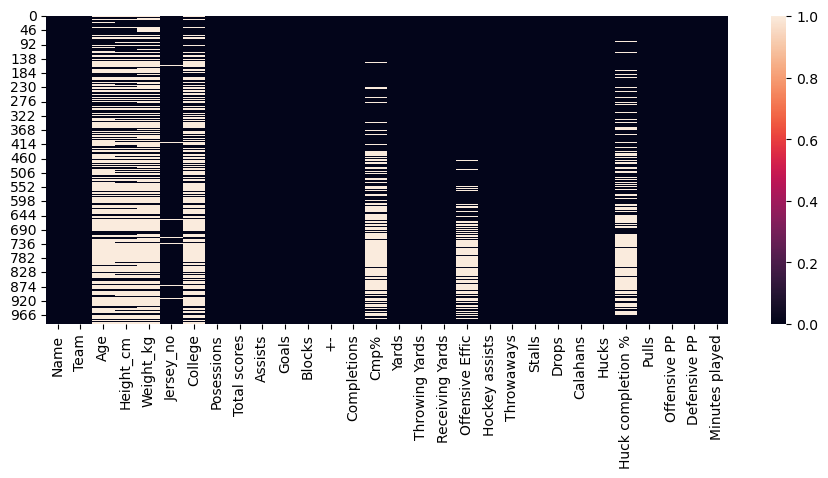

In [115]:
# visualizing missing data 
# quite a lot of missing data for some variables so keep that in mind during analysis

plt.figure(figsize = (11,4))
sns.heatmap(final_df.isnull())
plt.show()

## 5.2 Age, height and weigth of all AUDL players

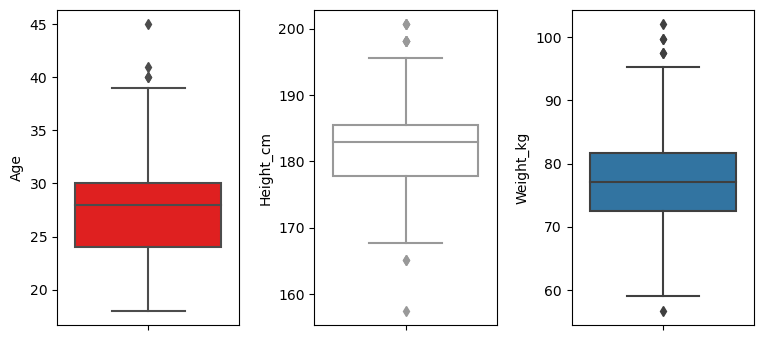

In [116]:
fig, ax = plt.subplots(1,3, figsize = (8,4))
fig.tight_layout(pad=2.0)

sns.boxplot(y = 'Age',orient = 'v', data = final_df, ax = ax[0], color = 'Red')
sns.boxplot(y = 'Height_cm',orient = 'v', data = final_df, ax = ax[1], color = 'w')
sns.boxplot(y = 'Weight_kg',orient = 'v', data = final_df, ax = ax[2])

plt.show()

In [1515]:
# age, height and weight statistics for all AUDL players 

final_df[['Age', 'Height_cm', 'Weight_kg']].describe().round()

,Age,Height_cm,Weight_kg
count,415.0,453.0,375.0
mean,28.0,182.0,77.0
std,4.0,7.0,8.0
min,18.0,157.0,57.0
25%,24.0,178.0,73.0
50%,28.0,183.0,77.0
75%,30.0,185.0,82.0
max,45.0,201.0,102.0


## 5.3 Team analysis

### Choose a team to analyse and plot statistics for each player in the team

In [107]:
# Team names: 

final_df.Team.unique()

array(['EC', 'POR', 'CHI', 'SLC', 'CAR', 'TOR', 'SD', 'COL', 'ATX', 'NY',
       'DC', 'PHI', 'MIN', 'OTT', 'IND', 'ATL', 'LA', 'PIT', 'DET', 'OAK',
       'DAL', 'MAD', 'BOS', 'MTL', 'TB', 'SEA', 'SW'], dtype=object)

In [112]:
# Statistics available: 

final_df.columns

Index(['Name', 'Team', 'Age', 'Height_cm', 'Weight_kg', 'Jersey_no', 'College',
       'Posessions', 'Total scores', 'Assists', 'Goals', 'Blocks', '+-',
       'Completions', 'Cmp%', 'Yards', 'Throwing Yards', 'Receiving Yards',
       'Offensive Effic', 'Hockey assists', 'Throwaways', 'Stalls', 'Drops',
       'Calahans', 'Hucks', 'Huck completion %', 'Pulls', 'Offensive PP',
       'Defensive PP', 'Minutes played'],
      dtype='object')

In [108]:
# Filter data for New York Empire as an example

ny = final_df.loc[final_df.Team == 'NY']
ny

,Name,Team,Age,Height_cm,Weight_kg,Jersey_no,College,Posessions,Total scores,Assists,...,Throwaways,Stalls,Drops,Calahans,Hucks,Huck completion %,Pulls,Offensive PP,Defensive PP,Minutes played
16,Jeff Babbitt,NY,28,187.96,102.0600,87,Massachusetts,281,61,4,...,5,1,0,0,1,100.00,0,210,83,307
28,Jack Williams,NY,28,185.42,70.3080,11,North Carolina-Wilmington,301,59,45,...,17,0,0,0,9,42.86,0,250,20,294
31,John Lithio,NY,29,195.58,88.4520,54,Hope College,299,64,19,...,9,0,2,0,6,75.00,0,255,18,291
79,Charles Weinberg,NY,29,180.34,77.1120,6,University of Delaware,231,39,26,...,8,0,3,0,8,66.67,0,189,2,223
92,Ben Katz,NY,31,172.72,68.0400,28,Massachusetts,159,27,16,...,10,1,1,0,4,80.00,0,5,238,278
103,Matt Stevens,NY,33,180.34,70.3080,17,Miami (Ohio),203,26,8,...,0,0,1,1,2,100.00,0,145,75,222
105,Antoine Davis,NY,29,187.96,83.9160,81,Virginia Tech,161,27,15,...,10,1,0,0,7,70.00,0,6,246,284
142,Mike Drost,NY,33,185.42,74.8440,16,Georgetown,136,15,7,...,0,0,1,0,0,NaN,0,4,197,223
167,Solomon Rueschemeyer-Bailey,NY,24,185.42,79.3800,9,Brown University,299,22,14,...,4,0,0,0,5,100.00,0,251,1,285
181,Elliott Chartock,NY,28,182.88,79.3800,10,Stanford,334,43,33,...,22,0,1,0,15,78.95,0,285,1,315


In [109]:
# Make a table for total scores per player on NY roster
ny_scores = final_df.loc[final_df.Team == 'NY'][['Name', 'Total scores']].sort_values('Total scores', ascending=False)

# If you want to look at another statistic, just change 'Total scores' with another column name in this code

In [110]:
ny_scores

,Name,Total scores
31,John Lithio,64
16,Jeff Babbitt,61
28,Jack Williams,59
181,Elliott Chartock,43
79,Charles Weinberg,39
92,Ben Katz,27
105,Antoine Davis,27
103,Matt Stevens,26
167,Solomon Rueschemeyer-Bailey,22
215,John Randolph,18


NameError: name 'ny_scores' is not defined

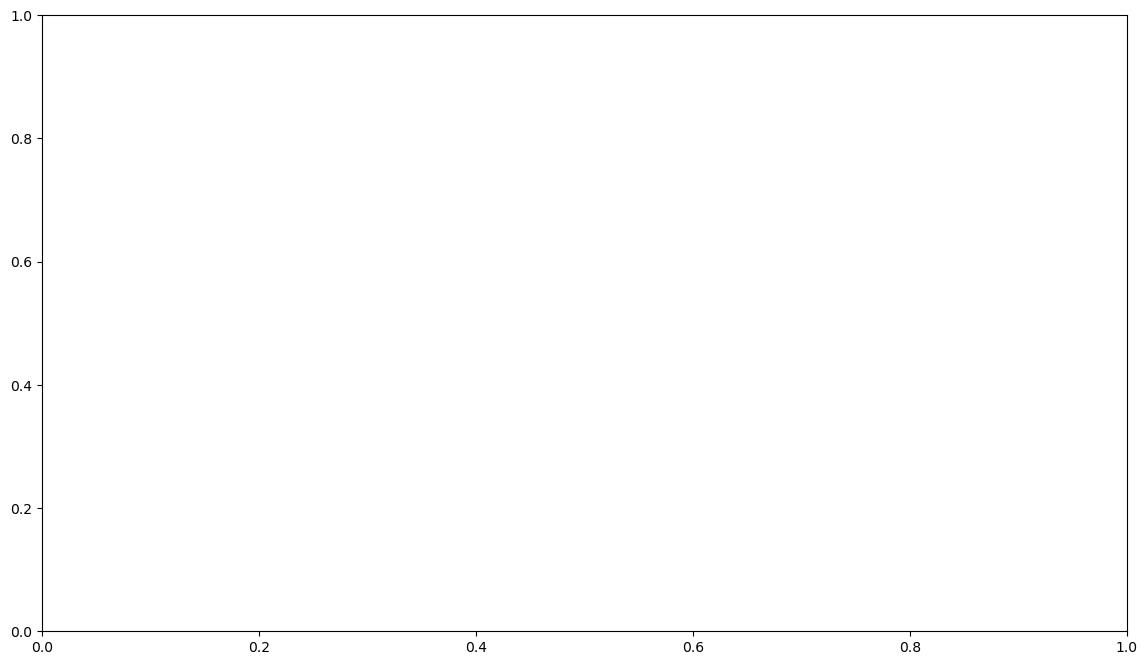

In [ ]:
# Plot total scores per player

fig, ax = plt.subplots(figsize = (14,8))
ax = sns.barplot(data = ny_scores, y = 'Name', x = 'Total scores', color = 'Red')
plt.show()